## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных 
по определению типа вина

Датасет содержит следующие колонки:
- Age - возраст
- Sex - пол
- Cp - тип боли в груди (4 шт.)
- Trestbps - артериальное давление в состоянии покоя
- Chol - холестораль сыворотки в мг/дл
- Fbs - сахар в крови натощак > 120 мг/дл
- Restecg - электрокардиографические результаты покоя (значения 0,1,2)
- Thalach - максимальная достигнутая частота сердечных сокращений
- Exang - стенокардия, вызванная физической нагрузкой
- Oldpeak - депрессия ST, вызванная физическими упражнениями относительно отдыха
- Slope - наклон сегмента ST пиковых упражнений
- Ca - количество крупных сосудов (0-3), окрашенных фторсоскопией
- Thal - 0 = нормальный; 1 = исправлен дефект; 2 = обратимый дефект
- Target - наличие сердечных заболеваний

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('data/heart.csv', sep=",")

In [37]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0


# 2) Корреляционный анализ

Text(0.5, 0.98, 'Корреляционная матрица с коэффициентом корреляции Пирсона')

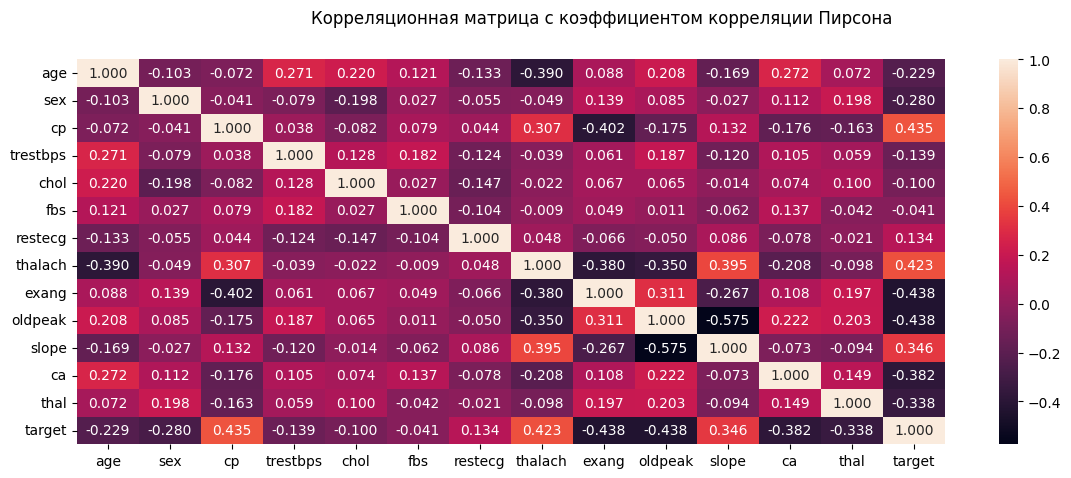

In [38]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(14,5))
sns.heatmap(data.corr(), annot=True, ax=ax, fmt='.3f')
fig.suptitle('Корреляционная матрица с коэффициентом корреляции Пирсона')

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:
- Наибольший вклад в определении (target) наличия сердечных заболеваний и, соответственно, наиболее информативными при построении моделей машинного обучения являются следующие признаки:
    - Cp (0.435) - тип боли в груди
    - Thalach (0.423) - максимальная достигнутая частота сердечных сокращений
    - Exang (-0.438) - наличие стенокардии, вызванной физической нагрузкой
    - Oldpeak (-0.438) - депрессия ST, вызванная физическими упражнениями относительно отдыха
- Также стоит принять во внимание и средне-коррелирующие признаки:
    - Slope (0.346) - наклон сегмента ST пиковых упражнений
    - Ca (-0.382)- количество крупных сосудов (0-3), окрашенных фторсоскопией
    - Thal (-0.338) - 0 = нормальный; 1 = исправлен дефект; 2 = обратимый дефект
- Стоит заметить, что не все выбранные признаки стоит использовать в построении ММО:
    - Признаки Cp и Exang имеют значительную корреляцию (-0.402). Из этих двух признаков стоит оставить только Cp

Из описанного выше можно сделать вывод о том, что на основе признаков Cp, Thalach, Oldpeak, Slope, Ca и Thal можно построить модель МО

# 3) График "Скрипичная диаграмма"

<Axes: xlabel='trestbps'>

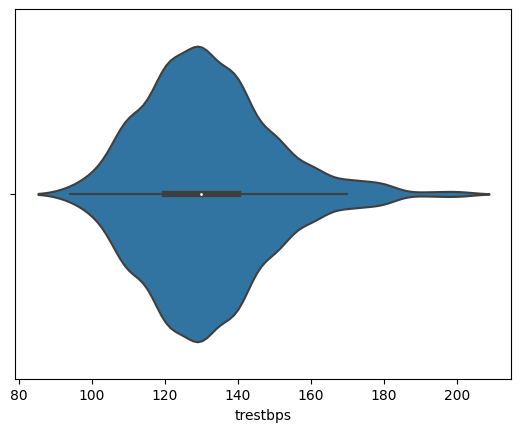

In [39]:
sns.violinplot(x=data['trestbps'])